# Predicting Diameter and Physical Harm of Asteroids using Machine Learning
**Authors** :
Colin Campbell (c_c953),  Leah Lewis (lrl68), Ryan Wakabayashi (rjw102) and Jake Worden (jrw294)

**Abstract** :  [  ]

## Introduction

 

 

## Problem Statement 
Question: How to use machine learning to predict the diameter of asteroids and classify them as physically hazardous.
* Asteroid diameter prediction based upon Asteroid_Updated.csv from Kaggle.
* Predict whether an asteroid is physically hazardous to Earth. 

* Success measures:
	* 5 - 10 fold CV accuracy for all models
	* Regression models: R^2 score
	* Classification models: Precision, Recall, ROC/AUC
	
* Hope to achieve >85% R^2 for regression models (based upon kaggle responses) and then >=80% precision and recall for the classification models (low goal based on amount of data for imbalanced classes).

### Related Work

The ability to take in data on nearby asteroids and identify whether or not they are a threat to life on earth is important for civilization going forward. One of the most important attributes to identify if an asteroid is a threat is the diameter of the asteroid. Companies like Nasa and SpaceX are currently working on technologies to identify these threats. Because this is something that is currently being researched in the field, it is important to try and identify what other attributes will help identify how hazardous these asteroids will be.

**Links to other work:** [Asteroid Diameter Estimators](https://www.kaggle.com/liamkesatoran/asteroid-diameter-estimators-with-added-difficulty),
                        [Asteroid Diameter Prediction](https://www.kaggle.com/titanpointe/asteroid),
                        [Asteroid Impact](https://www.sciencedirect.com/topics/engineering/asteroid-impact),

**Reasons to care:** [Planetary Defense](https://www.kaggle.com/liamkesatoran/asteroid-diameter-estimators-with-added-difficulty)

## Data Management 


### Data Gathering

Links to the database and dataset used can be found below:

*Small-Body DataBase Link:* [Jet Propulsion Laboratory Solar System Dynamics](https://ssd.jpl.nasa.gov/sbdb_query.cgi)

*Open Asteroid Dataset Link:* [Asteroid_Updated.csv](https://www.kaggle.com/basu369victor/prediction-of-asteroid-diameter?select=Asteroid_Updated.csv)

#### Open Asteroid Dataset Description:

1. The dataset was created on behalf of NASA by the Jet Propulsion Laboratory (JPL) at California Institute of Technology's "Solar System Dynamics"(SSD) group. One of the primary responsibilites of the SSD group is to maintain the Small-Body DataBase (SBDB) which is comprised of information relating to the orbits, physical parameters, discovery cirumstances and hazard assements for all known small-bodies in our solar system. In this context, small-bodies are defined as comets and asteroids, where “asteroids” includes Kuiper-belt objects (TNOs) and dwarf planets. This database is actively kept up-to-date, meaning as new data is made available for both new and existing small-bodies, new orbits are automatically computed typically within an hour or two.


2. The dataset used here was gathered from the SSD's SBDB via the Open Asteroid Dataset challange posted on [Kaggle](https://www.kaggle.com/basu369victor/prediction-of-asteroid-diameter?select=Asteroid_Updated.csv).


3. The dataset itself is composed of various instances of small-bodies along with their respective oribital elements. A summary of each of these elements or features along with a brief desciption can be seen in the following table:

| Feature | Description |
| ------- | ----------- |
| a | Semi-major axis(au) | 
| e | Eccentricity | 
| i | Inclination with respect to x-y ecliptic plain(deg) |
| om | Longitude of the ascending node |
| w | Argument of perihelion |
| q | Perihelion distance(au) |
| ad | Aphelion distance(au) |
| per_y | Oribital period(YEARS) |
| data_arc | Data arc-span(d) | float64 |
| condition_code | Orbit condition code |
| n_obs_used | Number of Observation used |
| H | Absolute magnitude parameter |
| neo | Near Earth Object | object |
| pha | Physically Hazardous Asteroid |
| diameter | Diameter of asteroid(Km) |
| extent | Object bi/tri axial ellipsoid dimensions(Km) |
| albedo | Geometric albedo |
| rot_per | Rotation Period(h) |
| GM | Standard gravitational parameter, Product of mass and gravitational constant |
| BV | Color index B-V magnitude difference |
| UB | Color index U-B magnitude difference |
| IR | Color index I-R magnitude difference |
| spec_B | Spectral taxonomic type(SMASSII) |
| spec_T | Spectral taxonomic type(Tholen) |
| G | Magnitude slope parameter |
| moid | Earth minimum orbit intersection distance(au) |
| class | Asteroid orbit class |
| n | Mean motion(deg/d) |
| per | Orbital period(d) |
| ma | Mean anomaly(deg) |

#### The data gathering phase will attempt to answer the following questions in regards to the dataset :

1. How many data entries are there and what datatypes are present?
2. How many null values, if any, are present in the dataset?
3. How many resources, in terms of memory, are used by the dataset?

**Importing all libraries for data gathering**

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')
import pandas as pd

**Read the csv file using pandas read_csv() method and print the first five entries**

In [ ]:
#df = pd.read_csv("/content/drive/MyDrive/ML/Project/Asteroid_Updated.csv")
df= pd.read_csv("./Asteroid_Updated.csv")
df.head()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (0,10,15,16,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,...,0.426,NaN,C,G,0.12,1.59478,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,...,0.284,NaN,B,B,0.11,1.23324,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,...,0.433,NaN,Sk,S,0.32,1.03454,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,...,0.492,NaN,V,V,0.32,1.13948,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,...,0.411,NaN,S,S,NaN,1.09589,MBA,0.238632,1508.600458,282.366289


**Use pandas shape method to identify the amount of data available**

In [ ]:
df.shape

(839714, 31)

**Use pandas info method to identify the data types, null values and memory usage**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839714 entries, 0 to 839713
Data columns (total 31 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            21967 non-null   object 
 1   a               839712 non-null  float64
 2   e               839714 non-null  float64
 3   i               839714 non-null  float64
 4   om              839714 non-null  float64
 5   w               839714 non-null  float64
 6   q               839714 non-null  float64
 7   ad              839708 non-null  float64
 8   per_y           839713 non-null  float64
 9   data_arc        824240 non-null  float64
 10  condition_code  838847 non-null  object 
 11  n_obs_used      839714 non-null  int64  
 12  H               837025 non-null  float64
 13  neo             839708 non-null  object 
 14  pha             823272 non-null  object 
 15  diameter        137636 non-null  object 
 16  extent          18 non-null      object 
 17  albedo    

From the data gathering, the following was obtained in relation to the initial inquries regarding the dataset:

1. There are a total of **839,714 data entries** each with **31 features** to explore. Of these features there are **21 float64**, **1 int64**, and **9 object data types**. 
2. Some features contain 0 null values while others contain more than **700,000 nulls**.
3. The data's memory usage is approximately **198.6MB**. 

**Based on this information, the data will need to undergo some exstensive pre-processing prior to any exploratory data analysis .**

### Data Pre-processing, Cleaning, Labeling, and Maintenance 

Initial data gathering showed that the dataset is comprised of 839,714 data entries consisting of 31 variables made up of 3 different data types (float64, int64, object). Additionaly, it was determined that while some of the data entries' features contained no null values, it was shown that approximately 700,000 entries contained at least one null value if not many more. Since the goal of this project is to create both a regressor and a classifer for targeting diameter and physically harzardous asteriod respectively there is a need to address the frequency of null value occurences throughout the dataset.

#### This phase of data expolartion will attempt to  address the following concerns: 
 
1. What features have a high number of Nulls? How will these null values be addressed for both regression and classification?
2. How will the incorrect data types be handled for regression?
3. How will any class imbalance be handled for classification?

**Importing all libraries for data pre-processing, cleaning, labeling and maintenance**

In [ ]:
from sklearn.preprocessing import LabelEncoder as le
import pandas as pd

### Answering Q1 from Data Pre-processing, Cleaning, and Maintence
What features have a high number of Nulls? How will these null values be addressed for both regression and classification?

***Print the sum of null values to determine which columns had a high percentage of null values.***

In [ ]:
print("The Sum of Null Values in The Dataframe\n" + "="*40 + "\n" + str(df.isnull().sum()))

The Sum of Null Values in The Dataframe
name              817747
a                      2
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     6
per_y                  1
data_arc           15474
condition_code       867
n_obs_used             0
H                   2689
neo                    6
pha                16442
diameter          702078
extent            839696
albedo            703305
rot_per           820918
GM                839700
BV                838693
UB                838735
IR                839713
spec_B            838048
spec_T            838734
G                 839595
moid               16442
class                  0
n                      2
per                    6
ma                     8
dtype: int64


As seen above, the name, diameter, extent, albedo, rot_per, GM, BV, G, UB, IR, pha, spec_B, spec_T features all contained above 700,000 null values. Therefore, each of these features, excluding our targets (diameter, pha), will be dropped from the dataframe.

**Use pandas drop method to drop the features from the dataframe**

In [ ]:
columns = ['name', 'extent', 'albedo', 'rot_per', 'GM', 'BV', 'G', 'UB', 'IR', 'spec_B', 'spec_T']
df.drop(columns=columns, inplace=True)

**Print the sum of null values in the dataframe after dropping the 11 features**

In [ ]:
print("The Sum of Null Values in The Dataframe\n" + "="*40 + "\n" + str(df.isnull().sum()))

The Sum of Null Values in The Dataframe
a                      2
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     6
per_y                  1
data_arc           15474
condition_code       867
n_obs_used             0
H                   2689
neo                    6
pha                16442
diameter          702078
moid               16442
class                  0
n                      2
per                    6
ma                     8
dtype: int64


### Answering Q2 from Data Pre-processing, Cleaning, and Maintence
How will the incorrect data types be handled for regression?

1. Encoded features with large amounts of null values that were found to be categorical.
2. Transformed remaining incorrect data types to numeric values.
3. Dropped any/all remaining null values.

**Create seperate dataframe to be used for regression**

In [ ]:
df_regression = df

**Use Label Encoder and dictionaries to map categorical data to numerical data**

In [ ]:
df_regression['pha'] = df_regression['pha'].map({'Y': 1, 'N': 0})
df_regression['neo'] = df_regression['neo'].map({'Y': 1, 'N': 0})
df_regression['condition_code'] = df_regression['condition_code'].map({0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10, 'D': 11, 'E': 12})
df_regression['class'] = le().fit_transform(df_regression['class'])

**Values that were adjusted:**
1. Physically Hazardous Asteroid (pha) mapped to binary.
2. Near Earth Object (neo) mapped to binary.
3. Orbit Condition Code (condition_code) transformed to integer values in range (1, 12)
4. Asteroid Orbit Class (class) transformed to numerical values (0, n_classes-1)

**Print the sum of null values in the dataframe following the encoding**

In [ ]:
print("The Sum of Null Values in The Dataframe\n" + "="*40 + "\n" + str(df_regression.isnull().sum()))

The Sum of Null Values in The Dataframe
a                      2
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     6
per_y                  1
data_arc           15474
condition_code    249756
n_obs_used             0
H                   2689
neo                    6
pha                16442
diameter          702078
moid               16442
class                  0
n                      2
per                    6
ma                     8
dtype: int64


**Set any non numeric values in diameter to NaN using the pandas to_numeric method**

In [ ]:
df_regression = df_regression.apply(lambda x: pd.to_numeric(x, errors='coerce'))
df_regression['diameter'].astype(float)

0         939.400
1         545.000
2         246.596
3         525.400
4         106.699
           ...   
687323      4.453
687490      2.567
687657      2.729
688035      1.468
688092      2.525
Name: diameter, Length: 127910, dtype: float64

**Print the sum of null values in the dataframe following the transformation**

In [ ]:
print("The Sum of Null Values in The Dataframe\n" + "="*40 + "\n" + str(df_regression.isnull().sum()))

The Sum of Null Values in The Dataframe
a                 0
e                 0
i                 0
om                0
w                 0
q                 0
ad                0
per_y             0
data_arc          0
condition_code    0
n_obs_used        0
H                 0
neo               0
pha               0
diameter          0
moid              0
class             0
n                 0
per               0
ma                0
dtype: int64


**Use pandas dropna method to remove any column which is comprised entirely of null values before removing any remaining null values**

In [ ]:
df_regression.dropna(how='all', axis=1, inplace=True)
df_regression.dropna(how='any', axis=0, inplace=True)

**Print the sum of null values in the dataframe following the data cleaning**

In [ ]:
print("The Sum of Null Values in The Dataframe\n" + "="*40 + "\n" + str(df_regression.isnull().sum()))

The Sum of Null Values in The Dataframe
a                 0
e                 0
i                 0
om                0
w                 0
q                 0
ad                0
per_y             0
data_arc          0
condition_code    0
n_obs_used        0
H                 0
neo               0
pha               0
diameter          0
moid              0
class             0
n                 0
per               0
ma                0
dtype: int64


**Now that the data for regression has been pre-processed and cleaned, exploratory data analysis can look deeper into modeling the diameter of asteroids**

### Answering Q3 from Data Pre-processing, Cleaning, and Maintence
How will any class imbalance be handled for classification?

The main hurdle we had to deal with was the massive imbalance in classes. Originally the dataset had a distribution of (0 : 499,000, 1: 1000) which caused the classification scores to be off since it was heavily influenced to class 0.

To deal with this, a Variational Autoencoder was created to generate 5000 extra samples to be used for the minority class. (This notebook is also included in the repository) The new data was appended to our existing dataframe and saved as a new csv. This caused slight problems with preprocessing as now it needed to be entirely separate from regression.

The main steps are as follows:


*   Read in new dataset
*   Visualize class distribution
*   Preprocess in similar way as regression
      * Add new values to dictionaries since they have slightly changed
*   Downsample the majority class (0) to match the minority class (1)



**Create seperate dataframe to be used for classification**

In [ ]:
df_classification = df

**Use pandas groupby method to visualize the class size distribution**

In [ ]:
class_counts = df_classification.groupby('pha').size()
print(class_counts)

The results from the above cell shows that the classes are disproportionate from one another and will lead to a high bias towards the majority class and give false high accuracy scores since it has so little of the minority class. To solve this problem, a ***Variational Autoencoder*** (VAE) was created to generate 
*5000* extra samples to be used for the minority class. (This notebook is also included in the repository) The new data was appended to our existing dataframe and saved as a new csv.

**Read the new csv file created by the VAE using pandas read_csv() method and print the first five entries**

In [ ]:
df_classification = pd.read_csv("./Asteroid_VAE_data.csv")
df.head()

**Use Label Encoder and dictionaries to map categorical data to numerical data**

In [ ]:
df_classification['pha'] = df_classification['pha'].map({'1.0' : 1, 'Y': 1, 'N': 0})
df_classification['neo'] = df_classification['neo'].map({'1.0' : 1, 'Y': 1, 'N': 0})
df_classification['condition_code'] = df_classification['condition_code'].map({'0': 1, '1': 2, '2': 3, '3': 4, '4': 5, 5:6, '5': 6, '6': 7, '7': 8, '8': 9, '9': 10, 'D': 11, 'E': 12, -0.0:1, -1.0:1, 2.0:2, 3.0:3, 4.0:4, 5.0:5, 6.0:6, 7.0:7, 8.0:8, 9.0:9})
df_classification['condition_code'] = df_classification['condition_code'].apply(lambda x: pd.to_numeric(x, errors='coerce'))
df_classification['class'] = le().fit_transform(df_classification['class'])

class_counts = df_classification.groupby('pha').size()
print(class_counts)

Condition code was dropped here due to it containing majority of the rows that are dropped in next cell. This maintained our pha class data and allowed us to have 16000 samples instead of 9000.

In [ ]:
df_classification = df_classification.drop(columns=['condition_code','diameter'])
print(df_classification.shape)
print(df_classification.isnull().sum())
class_counts = df_c.groupby('pha').size()
print(class_counts)

(839714, 16)
a                      2
e                      0
i                      0
om                     0
q                      0
ad                     6
per_y                  1
data_arc           15474
condition_code    257135
n_obs_used             0
H                   2689
neo               839714
pha               839714
moid               16442
class                  0
n                      2
dtype: int64


In [ ]:
df_classification.dropna(how='all', axis=1, inplace=True)
df_classification.dropna(how='any', axis=0, inplace=True)

print("Classification set: ", df_c.shape)
print(df_classification.isnull().sum())
print(df_classification.dtypes)

Classification set:  (586009, 16)
a                 0
e                 0
i                 0
om                0
q                 0
ad                0
per_y             0
data_arc          0
condition_code    0
n_obs_used        0
H                 0
neo               0
pha               0
moid              0
class             0
n                 0
dtype: int64
a                 float64
e                 float64
i                 float64
om                float64
q                 float64
ad                float64
per_y             float64
data_arc          float64
condition_code    float64
n_obs_used          int64
H                 float64
neo               float64
pha               float64
moid              float64
class               int64
n                 float64
dtype: object


Utilized resample to downsample the majority class to increase accuracy of classification predicitons and remove some bias the original data held.

In [ ]:
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = df_classification[df_classification['pha'].iloc[:,]==0]
df_minority = df_classification[df_classification['pha'].iloc[:,]==1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, replace=False, n_samples=4863)
df_classification = pd.concat([df_majority_downsampled, df_minority])
df_majority

Final visualization of class counts to ensure there was still relatively equal amounts of data.

Class 0 == Class 1 

In [ ]:
class_counts = df_classification.groupby('pha').size()
class_counts

### Exploratory Data Analysis 

Methods
* Visualization
  * seaborn pairplot - displays the interactions between features and the target values for both regression and classification
  * correlation heatmap - provides for a secondary source to visualize the strength of correlation between features and targets. 
* ANOVA
  * ANOVA - selects and transforms the dataset using it's top 10 features
Each of these methods suggest the same feature set for the target. In fact, an increase in accuracy is seen when using the ANOVA dataset.

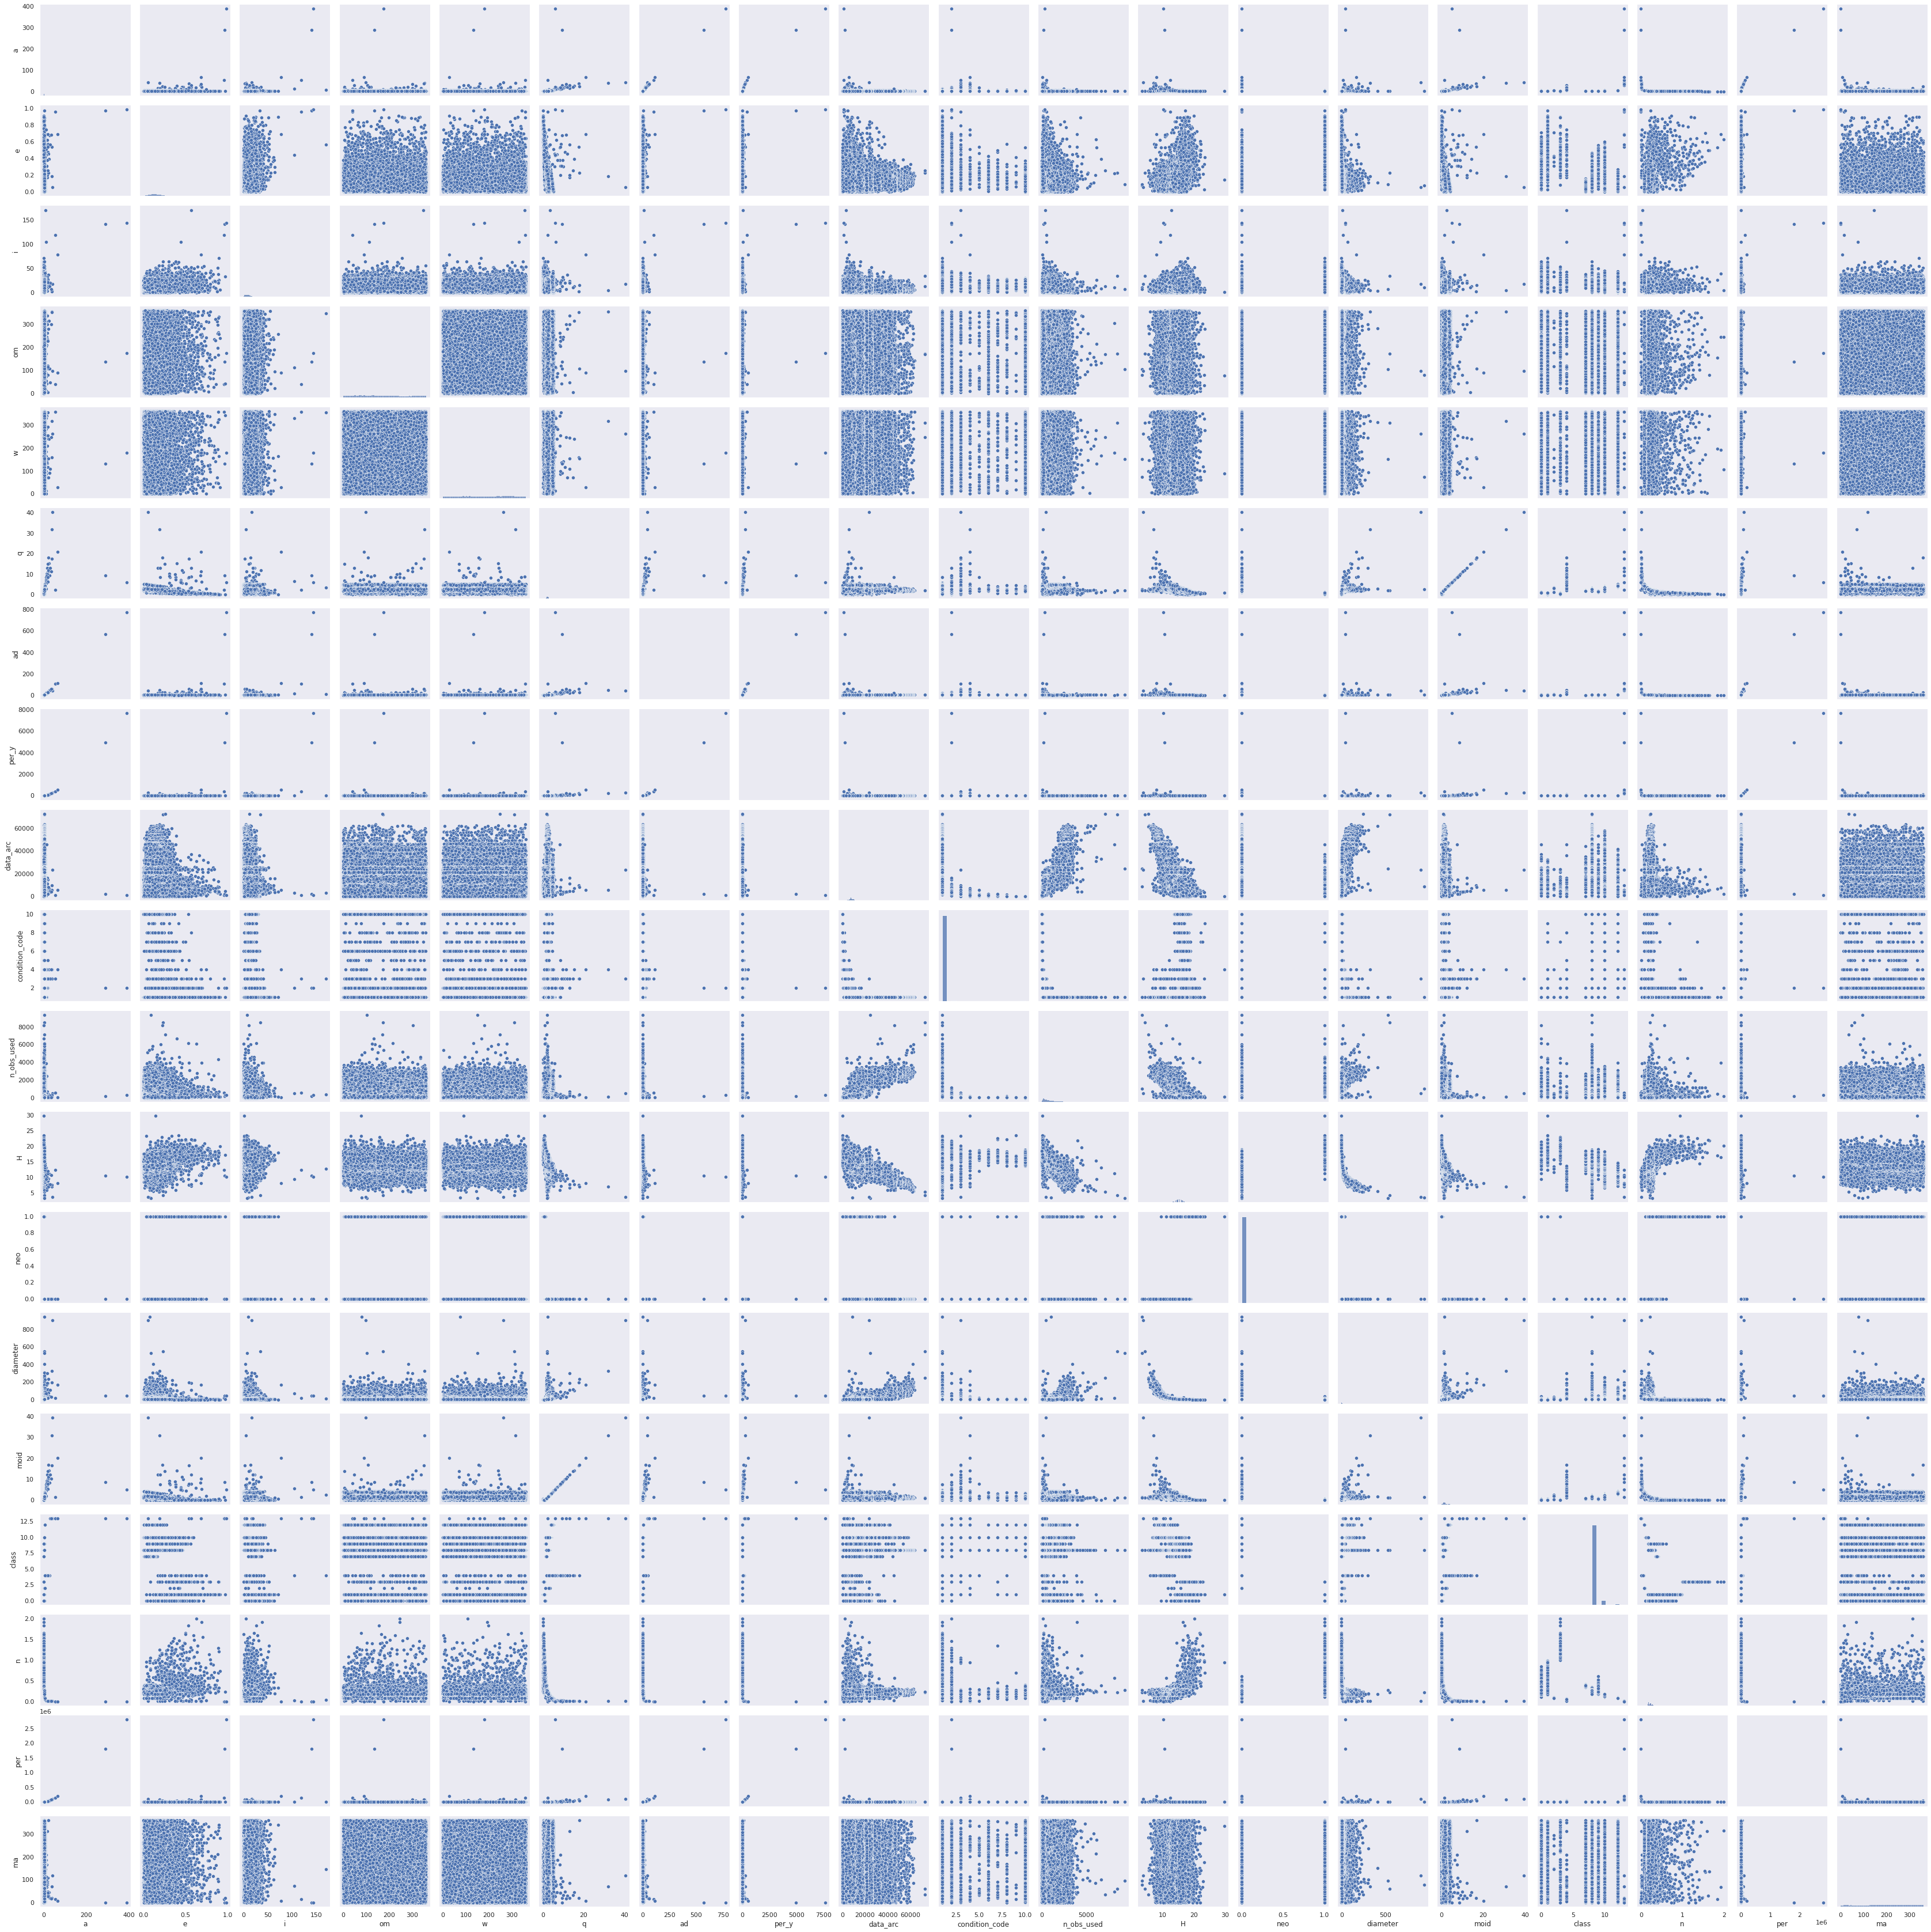

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="dark", color_codes=True)
g = sns.pairplot(data=df_r)

plt.show()

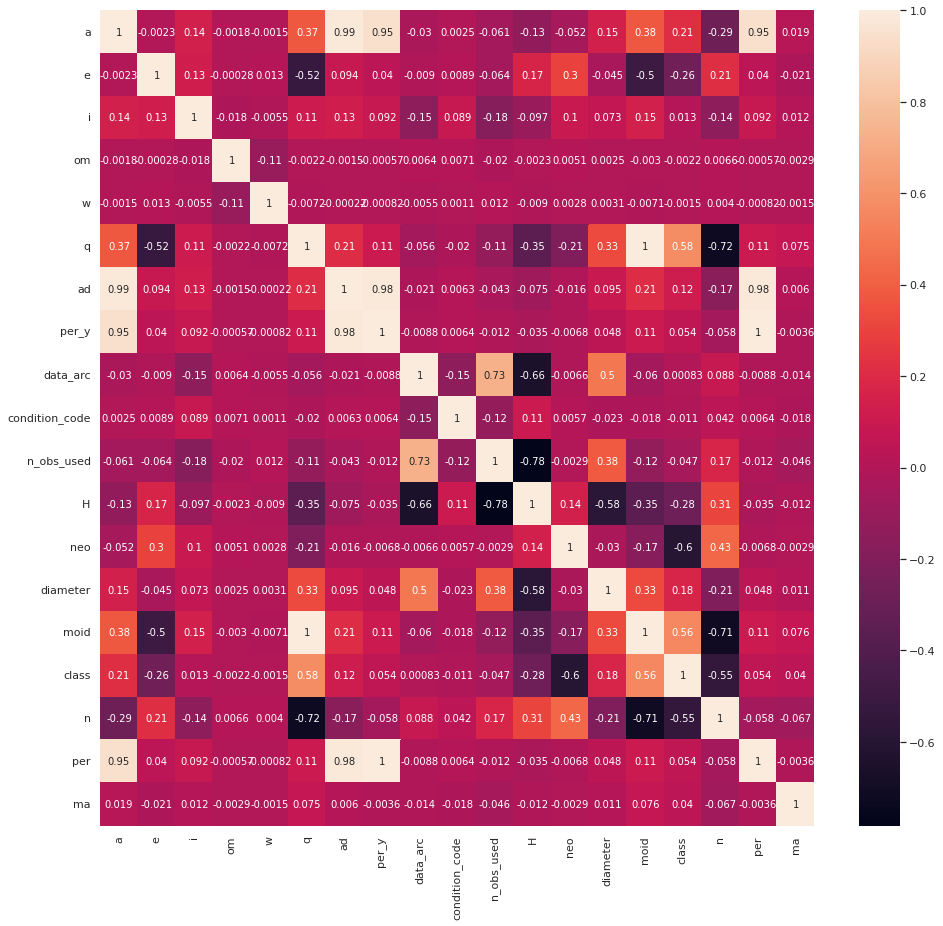

In [ ]:
plt.subplots(figsize = (16,15))
sns.heatmap(df_r.corr(),annot=True, annot_kws={'size':10})
# per, moid, H, per_y, ad, q, a

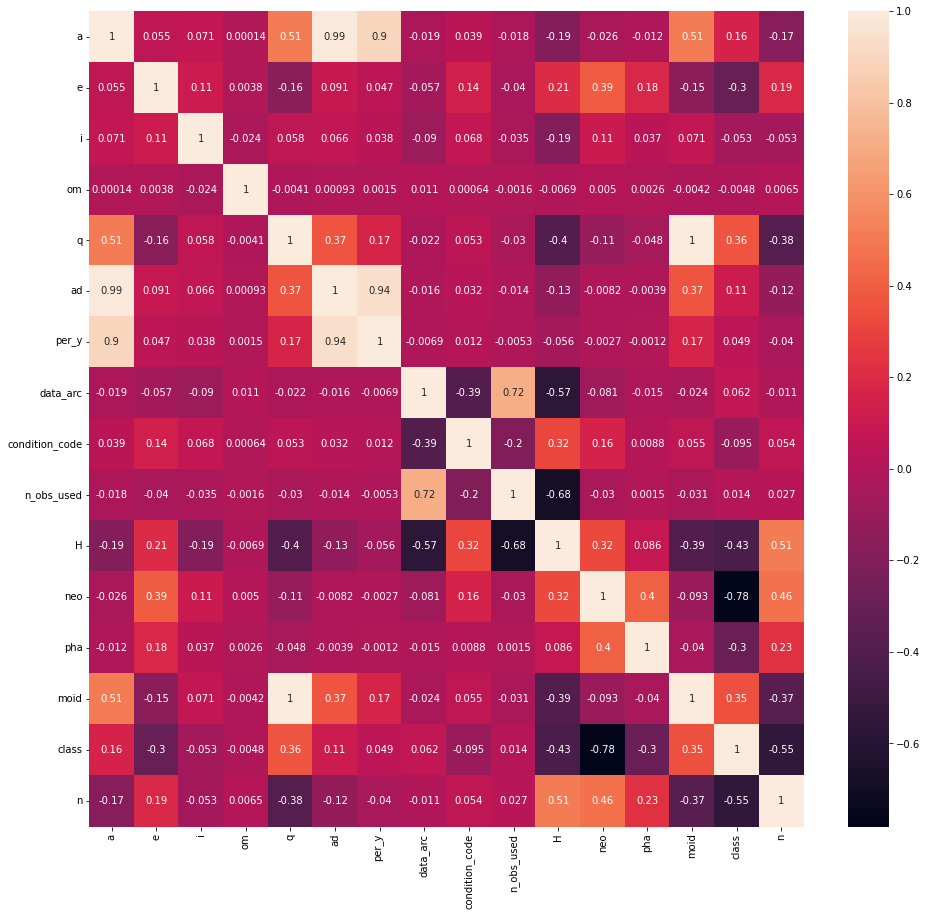

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize = (16,15))
sns.heatmap(df_c.corr(),annot=True, annot_kws={'size':10})
# neo, class, n 

In [ ]:
sns.set(style="dark", color_codes=True)
g = sns.pairplot(data=df_c)

plt.show()

### Determine Feature Selection

### Regression

In [ ]:
y = df_r.diameter
x = df_r.drop(columns=['diameter'])

In [ ]:
from sklearn.feature_selection import SelectKBest
# ANOVA on features on target to determine which features are significant
anova = SelectKBest(k=10)
# fitting ANOVA model with features and target
transX = anova.fit_transform(x, y)

for i in range(len(x.columns)):
    print(f'{x.columns[i]}: {anova.scores_[i]}')

print(transX.shape)

a: 31.637196697611962
e: 1.7842577610228874
i: 1.6621992239947543
om: 1.0029678571803067
w: 0.9957726525102564
q: 11.095961249580856
ad: 32.88636968270681
per_y: 40.74103699750826
data_arc: 8.099009943513074
condition_code: 0.5430670263398989
n_obs_used: 4.7797993210753
H: 17.841635817082636
neo: 10.855769669869455
moid: 11.16751345814331
class: 9.089789442546143
n: 9.203233992108766
per: 40.74103699750819
ma: 1.0542990472843297
(127910, 10)


Based on the ANOVA, heatmap, and pairplot we can see that there are multiple features that have high importance when determining diameter. 


1.   per / per_y
2.   ad
3.   a
4.   H
5.   q
6.   moid
7.   neo
8.   n
9.   class
10.  data_arc

### Classification

In [ ]:
x_c = df_c.drop(columns=['pha'])
y_c = df['pha']

In [ ]:
x_c = df_c.drop(columns='pha')
print("Classification ANOVA ", x_c.shape)
y_c = df_c['pha']
print(y_c.shape)

# ANOVA on features on target to determine which features are significant
anova = SelectKBest(k=10)
# fitting ANOVA model with features and target
anova.fit(x_c, y_c)

for i in range(len(x_c.columns)):
   print(f'{x_c.columns[i]}: {anova.scores_[i]}')

Classification ANOVA  (586009, 15)
(586009,)
a: 84.68069567245304
e: 20069.832318708486
i: 810.0783804268995
om: 3.867704137847501
q: 1352.9797534950687
ad: 9.122113716108583
per_y: 0.8437322582472434
data_arc: 130.89253845330657
condition_code: 45.00307562820942
n_obs_used: 1.279100346124286
H: 4415.367759886278
neo: 114189.44489031762
moid: 958.8449392478951
class: 57114.601557789516
n: 33704.148910439675


Based on the ANOVA and heatmap we can see that there are multiple features that have high importance when determining diameter. 


1.   neo
2.   class
3.   e
4.   q
5.   n
6.   moid
7.   i
8.   data_arc
9.   a
10.  condition_code

## Machine Learning Approaches

We tried multiple models for our regression prediction. When it came to parameter tuning, some took an excessive amount of resources and we chose to look elsewhere. If a model performed badly after gridsearch and 10-fold cross validation, we looked into more data and other methods of improving but inevitably found other models that performed well with less tuning and less computational cost. 

**All attempted models**

Regression:
*   Random Forest 
*   KNN
*   SGD
*   Lasso
*   Ridge
*   SVR

Classification
*   Logistic Regression



### Describe the ML methods that you used and the reasons for their choice. 
What is the family of machine learnign algorithms you are using and why? 
* Supervised or Unsupervised?
* Regression or classification?

### Justify ML algorithms in terms of the problem itself and the methods you want to use. 
* How did you employ them? 
* What features worked well and what didn't?
* Provide documentation for integration  

### Tools and Infrastructure Tried and Not Used

Describe any tools and infrastruicture that you tried and ended up not using.
What was the problem? 
Describe infrastructure used. 

## **Regression Models for predicting diameter**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

x_train, x_test, y_train, y_test = train_test_split(transX ,y, test_size = 0.2, random_state=1)

#### KNN Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(x_train, y_train)
print("Base KNN score:", knn.score(x_test,y_test))

Base KNN score: 0.6614015777427037


In [ ]:
"""
param_grid = {'n_neighbors' : [3],
                'weights' : ['distance'],
                'metric' : ['chebyshev','euclidean', ]
                 }

gs = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='r2', cv=10)
gs = gs.fit(x_train, y_train)
print(gs.best_params_)
print(gs.best_score_)
"""

After running the grid search with the parameter grid above, the following parameters were selected as the best performing

*   n_neighbors: 3
*   weights: 'distance'
*   metric: 'euclidean'

In [ ]:
bestKNN = KNeighborsRegressor(n_neighbors=3, weights='distance', metric='euclidean')
bestKNN.fit(x_train, y_train)
pred_knn_opt = bestKNN.predict(x_test)

print('Optimal KNN: ', bestKNN.score(x_test,y_test))

In [ ]:
import matplotlib.pyplot as plt
color = 1 - (y_test / pred_knn_opt)
fig, ax = plt.subplots()
plt.scatter(y_test, pred_knn_opt, c=color, cmap='plasma', vmin=-1, vmax=1, alpha=0.5)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax.set_xlabel("Actual Diameter")
ax.set_ylabel("Predicted Diameter")
plt.title("Actual vs Predicted Asteroid Diameter using KNN")

#### Epsilon-Support Vector Regression (SVR)

In [ ]:
from sklearn.preprocessing import StandardScaler as ss

sc = ss()
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.fit_transform(x_test)

In [ ]:
from sklearn.svm import SVR

svr=SVR()
svr.fit(x_train_std, y_train)
pred_svr = svr.predict(x_test_std)

print("Base SVR score: ", svr.score(x_test_std, y_test))

In [ ]:
#optimal model here
#pred_svr_opt = .predict()

In [ ]:
color = 1 - (y_test / pred_svr_opt)
fig, ax = plt.subplots()
plt.scatter(y_test, pred_svr_opt, c=color, cmap='plasma', vmin=-1, vmax=1, alpha=0.5)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax.set_xlabel("Actual Diameter")
ax.set_ylabel("Predicted Diameter")
plt.title("Actual vs Predicted Asteroid Diameter using SVR")

Parameter tuning for SVR will be accomplished with gridsearchCV on parameters C and epsilon ranging from 0.001 to 100 by multiples of 10.

SVR was selected after attempting Stochastic Gradient Descent. After over 72 hrs of parameter tuning, approximately .40 was the highest R2 score achieved. SGD Regression on this dataset required the max_iter to be changed from the default of 1,000 to 1,000,000 to ensure convergence occured. Parameters epsilon and eta0 made almost no impact on the SGD Regression score, but a slight difference in the alpha caused the score to jump from approximately .40 into an unrealistically large integer. 

#### Lasso Regressor


In [ ]:
from sklearn.linear_model import  Lasso

lasso_base = Lasso()
lasso_base.fit(x_train, y_train)
pred_lasso = lasso_base.predict(x_test)
print("Base lasso score: ", lasso_base.score(x_test,y_test))

Base lasso score:  0.3532033745553581


In [ ]:
"""
param_grid = [{'alpha':[1, 10, 25, 100, 500]},
              {'max_iter':[1000, 100, 500, 5000, 25000, 100000]},
              {'tol':[1e-4, 1e-6, 1e-10]},
              {'selection':['cyclic','random']},
              {'random_state':[10, 75, 200, 500, 1337, 5000]}]
gs = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2', cv=7, return_train_score=True)
lasso.fit(x_train, y_train)
gs = gs.fit(x_train, y_train)
print(gs.best_params_)
print(gs.best_score_)
"""

In [ ]:
color = 1 - (y_test / pred_lasso)
fig, ax = plt.subplots()
plt.scatter(y_test, pred_lasso, c=color, cmap='plasma', vmin=-1, vmax=1, alpha=0.5)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax.set_xlabel("Actual Diameter")
ax.set_ylabel("Predicted Diameter")
plt.title("Actual vs Predicted Asteroid Diameter using Lasso")

Parameter Tuning Results with Lasso

Alpha:
    When an alpha of 0 was available, it was always chosen and values were 0.36 for alpha = 0 and -.37 for alpha = 0.5. Any larger alpha values were not selected for by param_grid.

Selection:
    When alpha was not less than one, selection was chosen for, and 'random' was selected for as the type of selection. This gave a score of -.49.

Max_iter:
    When not tuning for selection, a max_iter of 1000 was selected with a score of -.49.

tol (tolerance):
    When not tuning for selection or max_iter, a tol of 0.0001 was chosen for with a score of -.49 once again.

Random_state:
    When not tuning for selection,max_iter, or tol a random state of 10 was chosen with the same score of -.49.

cv values:
    Any cv value that was under 7 gave a result that was larger than 1, getting larger the closer cv got to 0. The above values were calculated with cv=8, but with cv=7 a value of -.56 was obtained. The higher cv value the closer to 0 we got

#### Gradient Boosting Regressor

A fitted GBR model using it's default paramters. n_estimators = 100

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=0)
gbr.fit(x_train, y_train)
print("Base GBR score: ",gbr.score(x_test, y_test))

Base GBR score:  0.8695201784952427


In [ ]:
"""
param_grid = {'n_estimators' : [105],
             }
gbr = GradientBoostingRegressor()
gs = GridSearchCV(estimator=gbr, param_grid=param_grid, scoring='r2', cv=10)
gs = gs.fit(x_train, y_train)
print(gs.best_params_)
print(gs.best_score_)
"""

After running the grid search with the parameter grid above, the following parameters were selected as the best performing

*   n_estimators: 105

In [ ]:
gbr = GradientBoostingRegressor(n_estimators=105, random_state=0)
gbr.fit(x_train, y_train)
pred_gbr_opt = gbr_opt.predict(x_test)
print("Optimal GBR score: ",gbr.score(x_test, y_test))

Optimal GBR score:  0.870096168095368


In [ ]:
color = 1 - (y_test / pred_gbr_opt)
fig, ax = plt.subplots()
plt.scatter(y_test, pred_gbr_opt, c=color, cmap='plasma', vmin=-1, vmax=1, alpha=0.5)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax.set_xlabel("Actual Diameter")
ax.set_ylabel("Predicted Diameter")
plt.title("Actual vs Predicted Asteroid Diameter using GBR")

#### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_base = RandomForestRegressor()

rf_base.fit(x_train, y_train)
pred_rf_base = rf_base.predict(x_test)
print("Base RF score: ",rf_base.score(x_test,y_test))

Base RF score:  0.8876049875494103


In [ ]:
"""
param_grid = [{'n_estimators' : [100, 150, 200, 250, 300],
               'max_depth' : [None, 10, 20, 30, 40],
               'min_samples_split' : [2, 3, 4]}]

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='r2', cv=10, return_train_score=True)
gs.fit(xtrain,ytrain)
print("\nBest parameters: ",gs.best_params_)
print(gs.best_score_)
"""

After running the grid search with the parameter grid above, the following parameters were selected as the best performing

*   n_estimators: 100
*   max_depth 20
*   min_samples_split: 3


In [ ]:
rf_opt = RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_split=3)

rf_opt.fit(x_train, y_train)
pred_rf_opt = rf_opt.predict(x_test)

print("Optimal RF score: ", rf_opt.score(x_test,y_test))

Optimal RF score:  0.8855584506081506


In [ ]:
color = 1 - (y_test / pred_rf_opt)
fig, ax = plt.subplots()
plt.scatter(y_test, pred_rf_opt, c=color, cmap='plasma', vmin=-1, vmax=1, alpha=0.5)
# ax.scatter(y_test, pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax.set_xlabel("Actual Diameter")
ax.set_ylabel("Predicted Diameter")
plt.title("Actual vs Predicted Asteroid Diameter using RF")

### **Classification models for predicting if an asteroid is hazardous:**

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression as lr
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x_c, y_c, stratify=y_c, test_size=.3, random_state=1)

pca = PCA(n_components=2)
xtrain = pca.fit_transform(xtrain,ytrain)
xtest = pca.transform(xtest)

In [ ]:
lreg = lr()
lreg.fit(xtrain, ytrain)
pred_lreg = lreg.predict(xtest)

print("Base Logit: ", lreg.score(xtest,ytest))

cm = confusion_matrix(ytest, pred_lreg)
plt.figure()
plot_confusion_matrix(lreg, xtest, ytest)
plt.title("Logistic Regression Model - Confusion Matrix")
plt.xticks([0,1], ['No', 'Yes'])
plt.yticks([0,1], ['No', 'Yes'])
plt.show()

print(classification_report(pred_lreg, ytest))

Base Logit:  0.9983191413115817


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
lreg_scores = cross_val_score(lreg, xtest, ytest, cv=5)
print('Average 10-fold score: %.3f' % np.mean(lreg_scores))

In [ ]:
svc = SVC()
svc.fit(xtrain,ytrain)
pred_svc = svc.predict(xtest)

cm = confusion_matrix(ytest, pred_svc)
plt.figure()
plot_confusion_matrix(svc, xtest, ytest)
plt.title("SVC Model - Confusion Matrix")
plt.xticks([0,1], ['No', 'Yes'])
plt.yticks([0,1], ['No', 'Yes'])
plt.show()

print(classification_report(pred_svc, ytest))

In [ ]:
svc_scores = cross_val_score(svc, xtest, ytest, cv=5)
print('Average 10-fold score: %.3f' % np.mean(svc_scores))

In [ ]:
svc_opt = SVC(C=150)
svc_opt.fit(xtrain,ytrain)
pred_svc_opt = svc_opt.predict(xtest)

cm = confusion_matrix(ytest, pred_svc_opt)
plt.figure()
plot_confusion_matrix(svc_opt, xtest, ytest)
plt.title("SVC Model - Confusion Matrix")
plt.xticks([0,1], ['No', 'Yes'])
plt.yticks([0,1], ['No', 'Yes'])
plt.show()

print(classification_report(pred_svc_opt, ytest))

In [ ]:
svc_scores = cross_val_score(svc_opt, xtest, ytest, cv=5)
print('Average 10-fold score: %.3f' % np.mean(svc_scores))

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
pred_dt = dt.predict(xtest)

cm = confusion_matrix(ytest, pred_dt)
plt.figure()
plot_confusion_matrix(dt, xtest, ytest)
plt.title("DT Model - Confusion Matrix")
plt.xticks([0,1], ['No', 'Yes'])
plt.yticks([0,1], ['No', 'Yes'])
plt.show()

print(classification_report(pred_dt, ytest))

In [ ]:
dt_scores = cross_val_score(dt, xtest, ytest, cv=10)
print('Average 10-fold score: %.3f' % np.mean(dt_scores))

In [ ]:
dt_opt = DecisionTreeClassifier(min_samples_leaf=25, max_depth=7)
dt_opt.fit(xtrain,ytrain)
pred_dt_opt = dt_opt.predict(xtest)

cm = confusion_matrix(ytest, pred_dt_opt)
plt.figure()
plot_confusion_matrix(dt_opt, xtest, ytest)
plt.title("DT Model - Confusion Matrix")
plt.xticks([0,1], ['No', 'Yes'])
plt.yticks([0,1], ['No', 'Yes'])
plt.show()

print(classification_report(pred_dt_opt, ytest))

In [ ]:
dt_scores_opt = cross_val_score(dt_opt, xtest, ytest, cv=10)
print('Average 10-fold score: %.3f' % np.mean(dt_scores_opt))

99.8 seems too good to be true and there is suspicion it may be overfitting. Next steps are to use more models, do more data analysis and address class imbalance.

## Experiments

Give a detailed summary of the results of your work.

 * Setup - Here is where you specify the exact performance measures you used.  
   * Describe the data used in experiment for presenting dataset: Datasheets for Dataset template 
   * Describe your accuracy or quality measure, and your performance (runtime or throughput) measure. 
   
 * Please use visualizations whenever possible. Include links to interactive visualizations if you built them. 
 
 * You can also submit a separated notebook as an appendix to your report if that makes the visualization/interaction task easier. 
   * It would be reasonable to submit your report as a notebook, but please make sure it runs on one of the two standard environments, and that you include any required files. 

## Conclusion
In this section give a high-level summary of your results. If the reader only reads one section of the report, this one should be it, and it should be self-contained.  You can refer back to the Experiments Section for elaborations. This section should be less than a page. In particular emphasize any results that were surprising.

## References
List the references that cited in your project.

## Appendix

Explain the contributions of each member to the project. Include all supporting materials, e.g., additional figures/tables, Python code technical derivations.